#  **Analisis con Pandas y Kaggle (Core 8)**

Este conjunto de datos explora la relación entre los patrones de sueño y la salud en general. Incluye información detallada sobre los hábitos de sueño individuales, las métricas de salud y los factores del estilo de vida, lo que permite analizar cómo la calidad y la duración del sueño afectan el bienestar físico y mental. El conjunto de datos está diseñado para respaldar la investigación sobre la higiene del sueño, las condiciones de salud crónicas, la salud mental y las influencias del estilo de vida en el sueño.

# Sugerencias de Targets para ML en Dataset de Sueño y Salud

| Target               | Predicción esperada                                     | Modelo sugerido                          | Desafío principal                                        |
|----------------------|---------------------------------------------------------|-------------------------------------------|----------------------------------------------------------|
| quality_of_sleep     | Puntaje de calidad del sueño (1 a 10)                   | Regresión Lineal, Random Forest Regressor | Escala subjetiva; posible sesgo en autopercepción        |
| <font color="tomato">sleep_disorder</font>      |<font color="tomato"> Diagnóstico del trastorno (Insomnia, Apnea)</font>        |<font color="tomato"> Árbol de Decisión, Regresión Logística</font>    |<font color="tomato"> clases desbalanceadas </font>    |
| stress_level         | Nivel de estrés del 1 al 10                             | KNN Regressor, Gradient Boosting Regressor| Alta correlación con otras variables; posible multicolinealidad |
| bmi_category         | Clase de IMC (Normal, Overweight, Obese)                | Random Forest Classifier, SVM Classifier  | Variables de entrada pueden necesitar limpieza/codificación |

**DEA realizado en archivoEDA_panda&Kaggle.ipynb**

## Target elegido: sleep_disorder para predecir el diagnóstico del sueño

In [59]:
import pandas as pd

In [60]:
path = "/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/Sleep_health_and_lifestyle_ML.csv"
df = pd.read_csv(path)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
 13  sleep_category           374 non-null    object 
 14  actividad_fisica         3

In [62]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
person_id,374.0,188.0,108.0,1.0,94.0,188.0,281.0,374.0
age,374.0,42.0,9.0,27.0,35.0,43.0,50.0,59.0
sleep_duration,374.0,7.0,1.0,6.0,6.0,7.0,8.0,8.0
quality_of_sleep,374.0,7.0,1.0,4.0,6.0,7.0,8.0,9.0
physical_activity_level,374.0,59.0,21.0,30.0,45.0,60.0,75.0,90.0
stress_level,374.0,5.0,2.0,3.0,4.0,5.0,7.0,8.0
heart_rate,374.0,70.0,4.0,65.0,68.0,70.0,72.0,86.0
daily_steps,374.0,6817.0,1618.0,3000.0,5600.0,7000.0,8000.0,10000.0


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Split : features y target**
* Se estima conveniente incluir a todas las features en el X, para una primera versión de ML, en el caso de obtener métricas de predicción bajas o erróneas, se estimará la eliminación de algunas de ellas.

In [64]:
X=df.drop(columns='sleep_disorder')
y=df['sleep_disorder']

In [65]:
y.value_counts()

,count
sleep_disorder,
Insomnia,277
Sleep Apnea,97


In [66]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
 13  sleep_category           374 non-null    object 
 14  actividad_fisica         3

In [68]:
df.sleep_disorder.value_counts()

,count
sleep_disorder,
Insomnia,277
Sleep Apnea,97


In [69]:
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder', 'sleep_category', 'actividad_fisica'],
      dtype='object')

In [70]:
# Definir Variables
num_cols = ['age','quality_of_sleep', 'physical_activity_level','stress_level','heart_rate','daily_steps']

nom_cols = ['gender', 'occupation', 'bmi_category','blood_pressure','sleep_category','actividad_fisica']

# **Regresión Logistica**

In [71]:
# Preprocesamiento.
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)

])

In [72]:
# Pipeline con logistic regression.
pipeline_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [73]:
# Entrenar.
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'quality_of_sleep',
                                                   'physical_activity_level',
                                                   'stress_level', 'heart_rate',
                                                   'daily_steps']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'occupation',
                                                   'bmi_category',
                                                   'blood_pressure',
                                                   'sleep_category',
                                                   'actividad_fisica'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [74]:
# Prediccion.
y_pred_logreg = pipeline_logreg.predict(X_test)

In [75]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

**Algoritmo de Classificación con Árbol de desición**

In [76]:
# Preprocesador.
preprocessor_tree = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

# Modelo.
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor_tree),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42))
])

In [77]:
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'quality_of_sleep',
                                                   'physical_activity_level',
                                                   'stress_level', 'heart_rate',
                                                   'daily_steps']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'occupation',
                                                   'bmi_category',
                                                   'blood_pressure',
                                                   'sleep_category',
                                                   'actividad_fisica'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [78]:
# Prediccion.
y_pred_tree = pipeline_tree.predict(X_test)

In [79]:
# evaluar.
accuracy = accuracy_score(y_test, y_pred_tree)

**Algoritmo de Clasificación con KNN**

In [80]:
# Preprocesador.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=3))
])

In [81]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'quality_of_sleep',
                                                   'physical_activity_level',
                                                   'stress_level', 'heart_rate',
                                                   'daily_steps']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'occupation',
                                                   'bmi_category',
                                                   'blood_pressure',
                                                   'sleep_category',
                                                   'actividad_fisica'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [82]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

**Algoritmo de clasificación con Random Forest**

In [83]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("preprocessing", preprocessor_forest),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [84]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'quality_of_sleep',
                                                   'physical_activity_level',
                                                   'stress_level', 'heart_rate',
                                                   'daily_steps']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'occupation',
                                                   'bmi_category',
                                                   'blood_pressure',
                                                   'sleep_category',
                                                   'actividad_fisica'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [85]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

**Evaluación de los algoritmos o modelos entrenados para predecir el indice de Calidad sueño con la métrica de accuracy**

In [86]:
print("Accuracy Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Accuracy Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("Accuracy Random Forest :", accuracy_score(y_test, y_pred_forest))

Accuracy Regresión Logística: 0.92
Accuracy Árbol de Decisión: 0.88
Accuracy KNN: 0.88
Accuracy Random Forest : 0.88


# <font color="purple">**Conclusión y Exportación Mejor Modelo**</font>


Modelo recomendado: Regresión Logística
Su mayor precisión (0.92) indica que el problema probablemente tiene fronteras lineales claras entre clases. Además, es rápido, interpretable y no tan susceptible a overfitting como otros modelos.

**Recomendación adicional:**
Hacer validación cruzada y análisis de matriz de confusión, precisión y recall para verificar si hay clases desbalanceadas o errores críticos.

In [87]:
import joblib

path ='/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/mmodelo_RL.pkl'
joblib.dump(pipeline_logreg, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/mmodelo_RL.pkl']

# **<font color="tomato">Optimizadores con Gridsearch</font>**

In [88]:
from sklearn.model_selection import GridSearchCV

# **Optimizador KNN**

In [89]:
# Preprocesador.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

# Model.
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("model", KNeighborsClassifier())
])

In [90]:
# Optimizacion de hiperparametros.
knn_params = {
    "model__n_neighbors": [2, 3, 5, 10]

    }

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'quality_of_sleep',
                                                                          'physical_activity_level',
                                                                          'stress_level',
                                                                          'heart_rate',
                                                                          'daily_steps']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'occupation',
                                                                          'bmi_category',
                                                                          'blood_pressure',
                                                                          'sleep_category',
                                                                          'actividad_fisica'])])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [2, 3, 5, 10]},
             scoring='accuracy')

In [91]:
# Evaluación.
knn_bestg = knn_grid.best_estimator_ #prediccion con la mejor estimador

In [92]:
knn_bestg

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'quality_of_sleep',
                                                   'physical_activity_level',
                                                   'stress_level', 'heart_rate',
                                                   'daily_steps']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'occupation',
                                                   'bmi_category',
                                                   'blood_pressure',
                                                   'sleep_category',
                                                   'actividad_fisica'])])),
                ('model', KNeighborsClassifier(n_neighbors=2))])

In [93]:
y_pred_knng = knn_bestg.predict(X_test)

print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_) #mejor parametro --- > no es necesario probarlo, se puede hacer otro grisearch con 10, 15 , 20.. o menores..es hasta que mp cambie
print("accuracy:", accuracy_score(y_test, y_pred_knng))

KNN Regressor
Mejores parámetros: {'model__n_neighbors': 2}
accuracy: 0.88


# **Optimizador Random Forest**

In [94]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("pp", preprocessor_forest),
    ("model", RandomForestClassifier(random_state=42))
])

In [95]:
# Optimizacion de hiperparametros.
forest_params = {
    "model__n_estimators": [50, 100, 200] # El nombre debe coincidir con el nombre del modelo.
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=3, scoring="accuracy")
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'quality_of_sleep',
                                                                          'physical_activity_level',
                                                                          'stress_level',
                                                                          'heart_rate',
                                                                          'daily_steps']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'occupation',
                                                                          'bmi_category',
                                                                          'blood_pressure',
                                                                          'sleep_category',
                                                                          'actividad_fisica'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [96]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)


In [97]:

print("Random Forest Classifier")
print("Mejores parámetros:", forest_grid.best_params_)
print("Accuraccy:", accuracy_score(y_test, y_pred_forest))

Random Forest Classifier
Mejores parámetros: {'model__n_estimators': 50}
Accuraccy: 0.8933333333333333


El Random Forest Classifier con 50 árboles entrega el mejor desempeño general (Accuracy: 0.893).

KNN con k=2 tiene un rendimiento similar, pero sugiere posible overfitting debido al valor tan bajo de k. Un k pequeño puede funcionar bien en los datos de entrenamiento pero generalizar mal si hay ruido.

Ambos modelos están muy parejos, pero Random Forest ofrece mayor robustez y es menos sensible al preprocesamiento.

In [102]:

path ='/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/mmodelo_RF_GS.pkl'
joblib.dump(pipeline_forest, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/mmodelo_RF_GS.pkl']

# **Evaluación de los modelos**

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

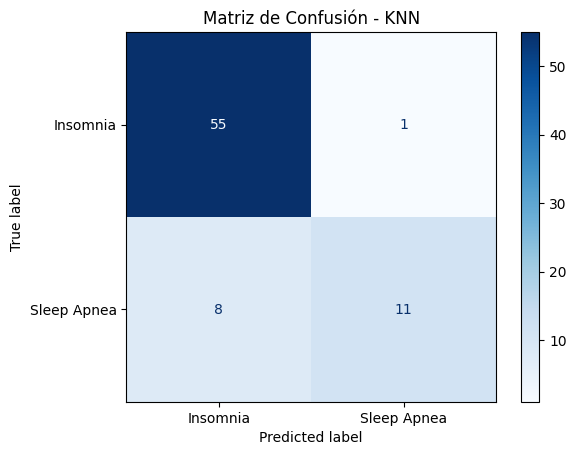

In [100]:
# Predicciones
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap="Blues", normalize=None)

plt.title("Matriz de Confusión - KNN")
plt.show()


## KNN
1. Para la clase 'Insomnia' acertó 55 y tuvo 1 error de predicción.
2. Para la clase 'Sleep Apnea" acertó 11 y tuvo 8 errores de predicción

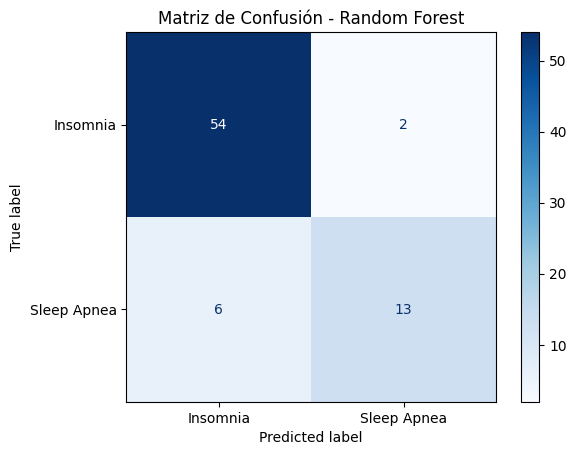

In [101]:
# Matriz de confusión - Random Forest
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, cmap="Blues", normalize=None)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

## Random Forest
1. Para la clase 'Insomnia' acertó 54 y tuvo 2 error de predicción.
2. Para la clase 'Sleep Apnea" acertó 13 y tuvo 6 errores de predicción

### 📋 Comparación Final de Modelos

| Métrica                  | KNN Classifier | Random Forest Classifier |
|--------------------------|----------------|---------------------------|
| Accuracy                 | 0.88           | **0.893**                 |
| Precisión (Sleep Apnea)  | **0.92**       | 0.87                      |
| Recall (Sleep Apnea)     | 0.58           | **0.68**                  |
| F1-score (Sleep Apnea)   | 0.71           | **0.76**                  |

### ✅ Conclusión General

- El modelo **Random Forest** presenta un mejor **equilibrio entre precisión y recall**, lo que lo hace más confiable para detectar correctamente casos de **Sleep Apnea**.
- Aunque **KNN** tiene una mayor precisión, **su recall es bajo**, lo que implica que **omite varios casos reales** de Sleep Apnea.
- Dado que el objetivo clínico suele ser **detectar correctamente todos los casos posibles**, se recomienda utilizar **Random Forest** como modelo final.
